 # Left to do Friday

 - Stop simulation when less than 2 particles are left

 - Use one door and adjust width of door (10 simulations per door, large radius)

 - Use one door and adjust door sight (10 simulations per door, large radius)

 - Use one door and one size and adjust the number of particles (10 simulations per door, large radius)

 - Number of doors (on different positions), play around with other things.

 - Plot the graphs in some nice way

### Vary door size 

In [1]:
from main import run_simulation, door
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_itterations = 100000

In [2]:

def vary_door_size(size_list, sim_per_size):
    n_particles = 100
    board_size = 50  # [m]
    particle_vision = 3 # [m]
    vision = 1000
    delta_t = 0.1
    particle_size = np.random.uniform(0.3,0.45, n_particles)
    time_list = []

    for size in size_list:
        doors = [
            door(np.array([0, -board_size/2]), size, vision, "horizontal")
        ]

        for i in range(sim_per_size):
            time_size = 0
            positions, v, time, _ = run_simulation(n_particles, particle_size, board_size, particle_vision, n_itterations, delta_t, doors)
            time_size += time

        time_list.append(time_size/sim_per_size)

    return time_list


In [3]:
min_size = 1
max_size = 10
n_sizes = 10
size_list = np.linspace(min_size, max_size, n_sizes)

sim_per_size = 4

time_list = vary_door_size(size_list, sim_per_size)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[47.6, 38.575, 32.775, 22.05, 21.9, 21.4, 22.15, 22.15, 20.925, 21.8]


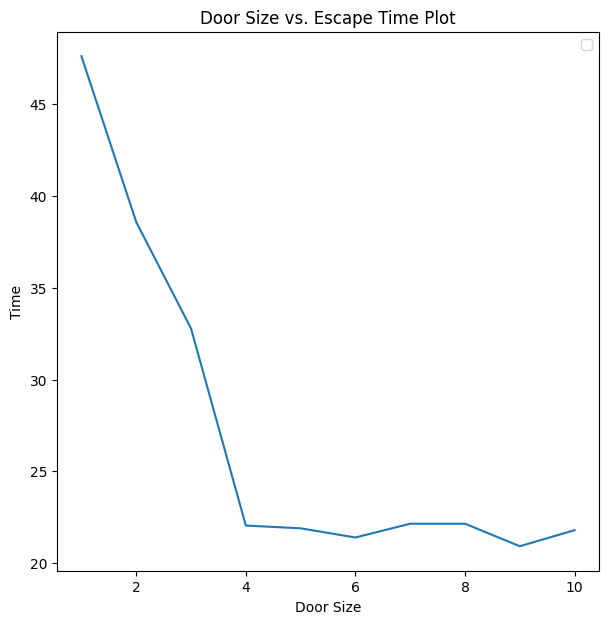

In [4]:
print(time_list)
plt.figure(figsize=(7, 7))
plt.plot(size_list, time_list)
plt.xlabel("Door Size")
plt.ylabel("Time")
plt.title("Door Size vs. Escape Time Plot")
plt.legend()
plt.show()

### Vary door sight

In [5]:

def vary_door_sight(size_list, sim_per_size):
    n_particles = 100
    board_size = 50  # [m]
    particle_vision = 3 # [m]
    delta_t = 0.1
    particle_size = np.random.uniform(0.3,0.45, n_particles) #For independent runs probably should just implement this in init func

   
    
    time_list = []

    for size_radius in size_list:
        print("Size ", round(size_radius,2))
        doors = [
            door(np.array([ -board_size/2, 0]), 1, size_radius, "vertical")
        ]


        for i in range(sim_per_size):
            time_size = 0
            positions, v, time, escape_times = run_simulation(n_particles, particle_size, board_size, particle_vision, n_itterations, delta_t, doors)
            time_size += time

        time_list.append(time_size/sim_per_size)

    return time_list


In [6]:

min_size = 5
max_size = 30
n_sizes = 5
size_list = np.linspace(min_size, max_size, n_sizes)

sim_per_size = 1

time_list_varying_sight = vary_door_sight(size_list, sim_per_size)


Size  5.0
Size  11.25
Size  17.5
Size  23.75
Size  30.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1212.1, 392.6, 282.5, 265.8, 235.9]
[ 5.   11.25 17.5  23.75 30.  ]


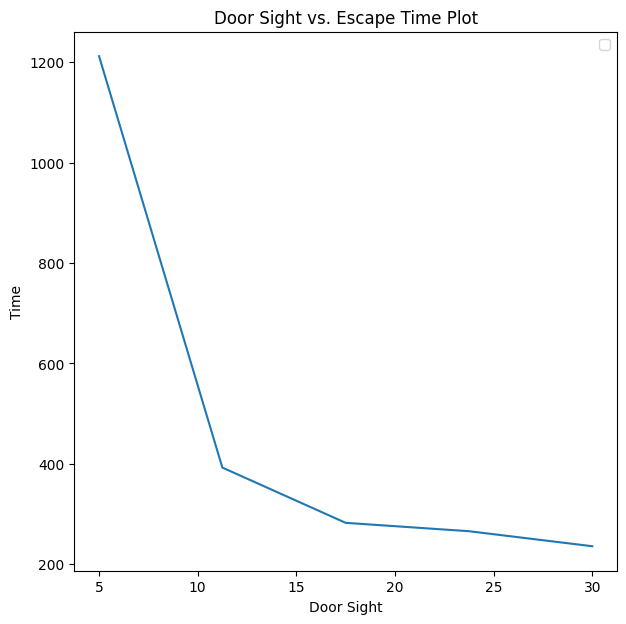

In [7]:
print(time_list_varying_sight)
print(size_list)
plt.figure(figsize=(7, 7))
plt.plot(size_list, time_list_varying_sight)
plt.xlabel("Door Sight")
plt.ylabel("Time")
plt.title("Door Sight vs. Escape Time Plot")
plt.legend()
plt.show()


### Different amounts of people (particles)

In [8]:


def vary_num_particles(size_list, sim_per_size):
    board_size = 50  # [m]
    particle_vision = 3 # [m]
    delta_t = 0.1
    door_sight = 1000
    door_width = 1
    
   
    
    time_list = []

    for num_particles in size_list:
        print("Particle amount: ", num_particles)
        doors = [
            door(np.array([ -board_size/2, 0]), door_width, door_sight, "vertical")
        ]


        for i in range(sim_per_size):
            particle_size = np.random.uniform(0.3,0.45, num_particles) 

            time_size = 0
            positions, v, time, escape_times = run_simulation(num_particles, particle_size, board_size, particle_vision, n_itterations, delta_t, doors)
            time_size += time

        time_list.append(time_size/sim_per_size)

    return time_list

In [9]:
from main import run_simulation, door
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

n_itterations = 100000
min_size = 10
max_size = 300
jump_size = 100
size_list = np.arange(min_size, max_size, jump_size)


sim_per_size = 1

time_list_varying_num_particles = vary_num_particles(size_list, sim_per_size)


Particle amount:  10
Particle amount:  110
Particle amount:  210


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[42.8, 209.7, 639.9]
[ 10 110 210]


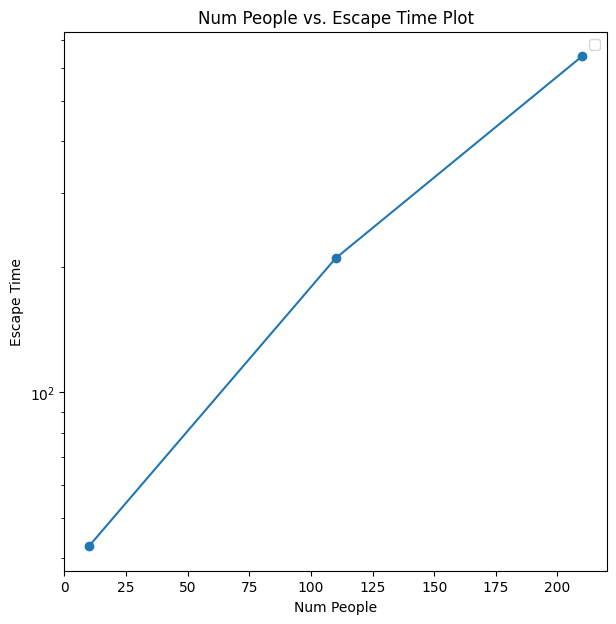

In [10]:
print(time_list_varying_num_particles)
print(size_list)
plt.figure(figsize=(7, 7))
plt.plot(size_list, time_list_varying_num_particles, "-o")
plt.xlabel("Num People")
plt.ylabel("Escape Time")
plt.title("Num People vs. Escape Time Plot")
plt.yscale("log")
plt.legend()
plt.show()




### Play with different doors

In [11]:

def vary_doors(doors, num_sims, board_size):
    particle_vision = 3 # [m]
    delta_t = 0.1
    num_particles = 100
    
   
    
    time_list = []



    for i in range(num_sims):
        particle_size = np.random.uniform(0.3,0.45, num_particles) 

        time_size = 0
        positions, v, time, escape_times = run_simulation(num_particles, particle_size, board_size, particle_vision, n_itterations, delta_t, doors)
        time_size += time

    time_list.append(time_size/num_sims)

    return time_list

In [12]:

from main import run_simulation, door
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

board_size = 50
n_itterations = 100000
doors = [door(np.array([board_size/2, 0]), 1, 10, "vertical"),
         door(np.array([-board_size/2, 0]), 1, 10, "vertical"),
         door(np.array([0, board_size/2]), 1, 10, "horizontal")]


num_sims = 5 
time_list_varying_doors = vary_doors(doors, num_sims, board_size)


[40.4]


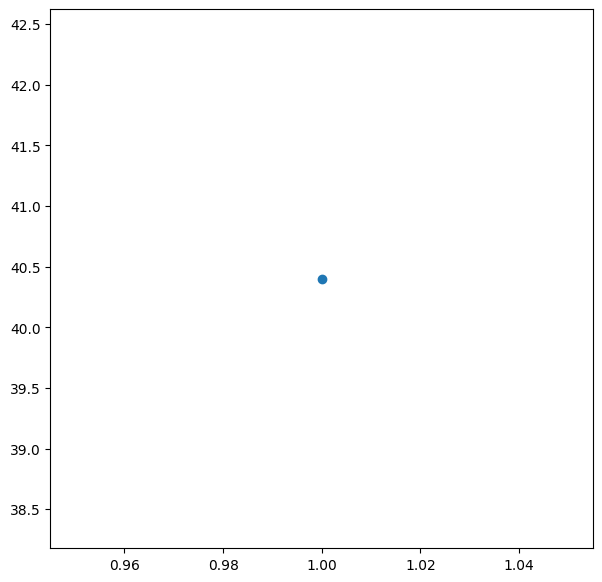

In [13]:
#wtf this is rarted
print(time_list_varying_doors)
plt.figure(figsize=(7, 7))
plt.plot(1, time_list_varying_doors, "-o")
plt.show()